In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import datetime
from datetime import date
import calendar
import numpy as np
from math import pi
from bokeh.io import show, output_file, output_notebook, reset_output
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, RangeTool
from bokeh.plotting import figure
from bokeh.plotting import figure, output_file, show
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource, Plot, LinearAxis, Grid
from bokeh.models.glyphs import Line
from bokeh.transform import cumsum
from bokeh.core.properties import value
from bokeh.palettes import Category20
import seaborn as sns
import matplotlib.pyplot as pyplot
%matplotlib inline

In [2]:
# numeros totales

#palabras promedio por mensaje por usuario
# palabras mas comunes del grupo por año
# palabras mas comunes por usuario




In [2]:
with open('chatdh.txt', 'r', encoding="utf8") as myfile:
  data = myfile.read()
sentences = data.split('\n')  
len(sentences)

FileNotFoundError: [Errno 2] No such file or directory: 'chatdh.txt'

In [94]:
df = pd.DataFrame()
for i in range(1,len(sentences)-1):
    date=None
    usertext=None
    user=None
    text=None
    try:
        date = sentences[i].split('-',1)[0].strip()
        usertext = sentences[i].split('-')[1].strip()
        user = usertext.split(':',1)[0].strip()
        text = usertext.split(':',1)[1].strip()
    except IndexError: 
        pass
    
    
    
    serie = pd.Series([user, date, text], index=['user', 'date', 'text'])
    df = df.append(serie, ignore_index=True)
export_csv = df.to_csv (r'chats-data2')


In [3]:
df = pd.read_csv('chats-data') 

In [4]:
print(df.shape,' tamaño antes de dropear')
df = df.dropna(axis=0, how='any') # tira las filas que tienen al menos un registro NaN/NaT 
print(df.shape,' tamaño despues de dropear')

(133500, 4)  tamaño antes de dropear
(126147, 4)  tamaño despues de dropear


In [5]:
#convierte la columna date a formato DateTime
df.date = pd.to_datetime(df.date,format='%d/%m/%y %H:%M', errors='coerce')

#crea nuevas columnas en base a datos de fecha
df['week'] = df.date.dt.week
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['weekdaynr'] = df.date.dt.weekday
df['hour'] = df.date.dt.hour
df['date3'] = df.date.dt.date
df['date4'] = df.date.dt.strftime('%m-%Y')
df['weekdaynr'] = df.date.dt.weekday
    
    
    


print(df.shape,' tamaño antes de dropear excepciones coerce / NaT values')
df = df.dropna(axis=0, how='any') # tira las filas que tienen al menos un registro NaN/NaT 
print(df.shape,' tamaño despues de dropear expepciones coerce / NaT values')
df.sample(3)


(126147, 11)  tamaño antes de dropear excepciones coerce / NaT values
(126143, 11)  tamaño despues de dropear expepciones coerce / NaT values


,Unnamed: 0,date,text,user,week,year,month,weekdaynr,hour,date3,date4
47243,47243,2017-07-02 19:44:00,en la quinta a diferencia de uds,Lobo cl,26.0,2017.0,7.0,6.0,19.0,2017-07-02,07-2017
94909,94909,2018-11-04 19:45:00,Terrible,Pelado Ale,44.0,2018.0,11.0,6.0,19.0,2018-11-04,11-2018
1254,1254,2016-03-30 13:13:00,<Multimedia omitido>,Shafal,13.0,2016.0,3.0,2.0,13.0,2016-03-30,03-2016


In [6]:
df['weekdaynr'] = df.date.dt.weekday

weekDays = ["Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo"]
#df['weekday'] = weekDays[df['weekday']]

#df['weekday'] = df['weekday'].apply(lambda x: weekDays[df['weekday']])
df['weekday'] = df['weekdaynr'].apply(lambda x: weekDays[x])
df.sample(3)

,Unnamed: 0,date,text,user,week,year,month,weekdaynr,hour,date3,date4,weekday
94744,94744,2018-11-02 07:44:00,Qué oooo,Rama cl,44.0,2018.0,11.0,4,7.0,2018-11-02,11-2018,Viernes
53164,53164,2017-08-25 21:31:00,estoy esperando el bondi,Lobo cl,34.0,2017.0,8.0,4,21.0,2017-08-25,08-2017,Viernes
49294,49294,2017-07-17 11:18:00,<Multimedia omitido>,Pon Cl,29.0,2017.0,7.0,0,11.0,2017-07-17,07-2017,Lunes


In [7]:
#print("%02d - %02d" % (df.date.dt.month, df.date.dt.year))

#df['date4'] = (df.date.dt.month, df.date.dt.year) = *


Cantidad de mensajes totales del grupo estudiados: 126143
Cantidad de mensajes promedio por dia: 95.99923896499239
top cinco dias mas activos date3
2018-11-24    1189
2018-04-29     536
2018-02-17     510
2018-10-31     509
2016-04-19     484
Name: date, dtype: int64


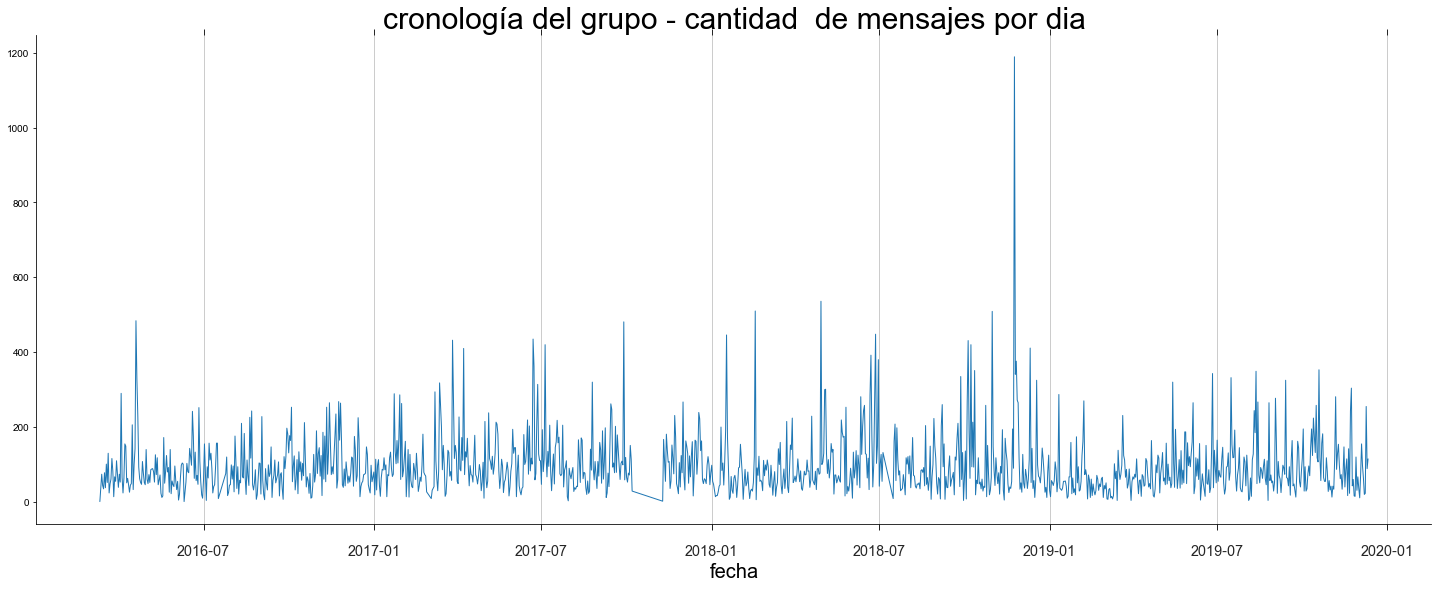

In [8]:


df_graph1 = df.groupby('date3').count()



a4_dims = (25, 9)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.set(style="white")

plt.xlabel('fecha', fontsize=20)
x = df_graph1.index
y = df_graph1.text

ax.tick_params(axis='x',pad=15,labelsize='large', reset=True, gridOn=True ,width=1)
dates = df['date4']

data = df_graph1.text
datamean = data.rolling(5).mean()
sns.despine()
plt.title('cronología del grupo - cantidad  de mensajes por dia', fontsize=30)





sns.lineplot(data=[data], palette="tab10", linewidth=1, legend=False)#, title='historia del grupo!)
#sns.regplot(x=df_graph1,y= df_graph1.text,data=data, fit_reg=True) 
print('Cantidad de mensajes totales del grupo estudiados:',df.text.count())
print('Cantidad de mensajes promedio por dia:',df_graph1.date.mean())
print('top cinco dias mas activos',df_graph1.date.sort_values(ascending=False)[0:5])



In [9]:
top_chat_day = df_graph1.date.sort_values(ascending=False).index[0]

print('15 mensajes random del dia mas activo del grupo:',top_chat_day)
df.loc[df['date3'] == top_chat_day].text.sample(15)

15 mensajes random del dia mas activo del grupo: 2018-11-24


97388                                         No me olvido
97029    Cantaste 3 años abandonare ahora no me digas d...
97079                                           Kick ogui?
97324                             Para ir a ver el partido
97379                               Fue afuera del estadio
96919                                                 jaja
96863                           Acá me sale el facho total
97490                                                   Ah
96880    SE SUSPENDE EL PARTIDO Y SE JUEGA MAÑANA EN VE...
97540                                             Sopaaaaa
97077                                              twitter
97044                                    soy un trabajador
96749                                         es otra cosa
97226                                                Cagon
97634                           iba a ser titular hoy nico
Name: text, dtype: object

 #### graph 2 - actividad por horas por año

In [10]:
years_lists = df.year.unique()
df_graph2 = pd.DataFrame()

for i in years_lists:
    serie_graph2 = df.loc[df['year'] == i].groupby('hour').count().text.transpose()#.drop(index=i)
    df_graph2 = df_graph2.append(serie_graph2, ignore_index=True)
    
df_graph2.index = years_lists
df_graph2.index = df_graph2.index.astype('int') 



tomando el comportamiento del último año
hora del día con mayor actividad para mejorar tu probabilidad de lectura de tu mensaje -- 12.0 hs
hora del día con menor actividad para decir algo y pasar desapercibido -- 5.0 hs


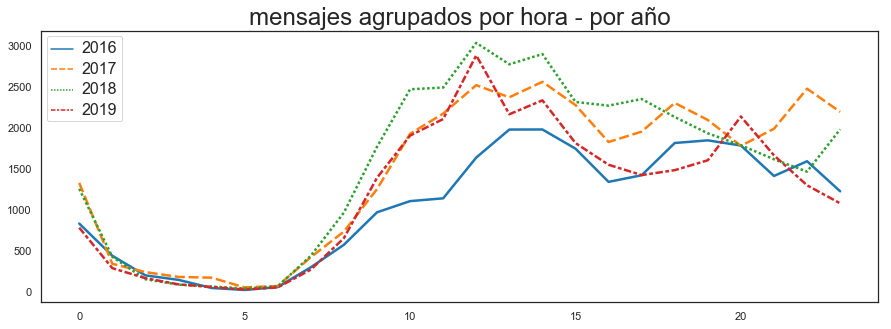

In [11]:


a4_dims = (15, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)

plt.title('mensajes agrupados por hora - por año', fontsize=24)

sns.set(style="whitegrid")
data = df_graph2.transpose()
sns.lineplot(data=data, palette="tab10", linewidth=2.5)
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text

ultimo_año_msg_x_hora = data[data.columns[-1]]
print('tomando el comportamiento del último año')
print('hora del día con mayor actividad para mejorar tu probabilidad de lectura de tu mensaje --',ultimo_año_msg_x_hora.idxmax(),'hs') 
print('hora del día con menor actividad para decir algo y pasar desapercibido --',ultimo_año_msg_x_hora.idxmin(),'hs')

In [12]:
#preparing data 

df_graph3 = df[['year','user','text']].groupby(['year','user']).count()
df_graph3 = df_graph3.sort_values(by=['year','text'], ascending=[False,False])
df_grpah_unstacked = df_graph3.unstack().transpose()
df_grpah_unstacked.index = [i[1] for i in df_grpah_unstacked.index]
df_grpah_unstacked = df_grpah_unstacked.fillna(0)

dict1 = {'years' : df_grpah_unstacked.columns.values.tolist()}
indexlist = list( map(str, df_grpah_unstacked.index))
dict2 = dict(zip(indexlist,df_grpah_unstacked.values.tolist()))
dict1.update(dict2)


a = Category20[20]
b = Category20[20]

colorrr = a + b
users = [df_grpah_unstacked.index.values]
#colorrr[0:len(df_grpah_unstacked.index)]

In [13]:


#output_file("stackeddh.html")
reset_output()
output_notebook()

years = [df_grpah_unstacked.columns.values]
users = [df_grpah_unstacked.index.values]
colors = colorrr[0:len(df_grpah_unstacked.index)]

data = dict1


users = list( map(str, df_grpah_unstacked.index))

p = figure(plot_height=500,plot_width=800, title="Mensajes por año",
           toolbar_location="right", tools="wheel_zoom,pan,hover,box_select,reset,save", tooltips="$name @$name")#, x_range=years)

p.vbar_stack(users, x='years', width=0.6, source=data, color=colors)# legend=value(users))

p.title.text_font_size = '15pt'
p.y_range.start = 0
p.x_range.range_padding = 0.5
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None

# p.legend.location = "top_right"
# p.legend.orientation = "vertical"
# p.legend.title = 'Usuario'
# p.legend.title_text_font_style = "bold"
# p.legend.label_text_font_size = "8pt"


show(p)


Loading BokehJS ...

In [14]:
multimedia_msgs = df.loc[df['text'] == '<Multimedia omitido>'].groupby('user').count().sort_values('date', ascending=[False])
multimedia_msgs = multimedia_msgs.text

print('los tres miembros del grupo que mas mensajes multimedia envian al grupo y deberias conversar para ahorrar en tarjetas de memoria')
multimedia_msgs[0:3]


los tres miembros del grupo que mas mensajes multimedia envian al grupo y deberias conversar para ahorrar en tarjetas de memoria


user
Fede Sharley    3823
Pon Cl          1402
Shafal          1321
Name: text, dtype: int64

In [15]:





#output_file("pie.html")



colors = colorrr[0:len(multimedia_msgs.index)]

data = pd.Series(multimedia_msgs).reset_index(name='value').rename(columns={'index':'usuario'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = colors
data = data.sort_values(by=['value'], ascending=[False])
p = figure(toolbar_location="right", plot_height=350, title="Mensajes multimedia enviados", 
           tools="hover,reset,save", tooltips="@user: @value", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', source=data )
p.title.text_font_size = '12pt'
p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None

show(p)
